In [32]:
import numpy as np
import bisect

from matplotlib import pyplot as plt

In [33]:
from pixel3d import Pixel3D

In [34]:
from topologicalunionfind import TopologicalUnionFind

### Reading Cube

In [35]:
cube = np.array([[[3, 6, 9],
                  [3, 1, 5],
                  [3, 4, 3]],

                 [[8, 7, 4],
                  [8, 4, 5],
                  [4, 7, 5]],

                 [[7, 8, 2],
                  [2, 1, 5],
                  [6, 6, 7]]])

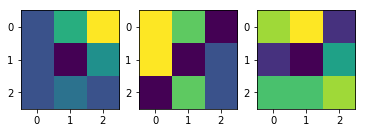

In [36]:
fig1 = plt.subplot(1, 3, 1)
fig1.imshow(cube[0])
fig2 = plt.subplot(1, 3, 2)
fig2.imshow(cube[1])
fig3 = plt.subplot(1, 3, 3)
fig3.imshow(cube[2])
plt.show()

### Getting Data

In [6]:
reverse = True
diagonal = False

In [7]:
if reverse:
    data = cube.max() - cube + 1
else:
    data = cube
data.shape

(3, 3, 3)

### Generating Input File

In [8]:
if reverse: 
    if diagonal:
        ainput = 'toy3dr.txt'
    else:
        ainput = 'toy3dr2.txt'
else:
    if diagonal:
        ainput = 'toy3d.txt'
    else:
        ainput = 'toy3d2.txt'

In [9]:
if diagonal:
    with open(ainput, 'w') as f:
        f.write(str(len(data.shape))+'\n')
        for l in data.shape:
            f.write(str(l)+'\n')
        for i in data.flatten():
            f.write(str(i)+'\n')

In [10]:
if not diagonal:
    with open(ainput, 'w') as f:
        f.write(str(len(data.shape))+'\n')
        for i in range(0, data.shape[0]):
            for j in range(0, data.shape[1]):
                for k in range(0, data.shape[2]):
                    f.write('0 {} {} {} {}\n'.format(i, j, k, data[i, j, k]))
                    if i+1<data.shape[0]:
                        f.write('1 {} {} {} {} {} {} {}\n'.format(i, j, k, i+1, j, k, 
                                                                  max(data[i, j, k], data[i+1, j, k])))
                    if j+1<data.shape[1]:
                        f.write('1 {} {} {} {} {} {} {}\n'.format(i, j, k, i, j+1, k, 
                                                                  max(data[i, j, k], data[i, j+1, k])))
                    if k+1<data.shape[2]:
                        f.write('1 {} {} {} {} {} {} {}\n'.format(i, j, k, i, j, k+1, 
                                                                  max(data[i, j, k], data[i, j, k+1])))

### Running

In [11]:
import subprocess

In [12]:
if diagonal:
    subprocess.run(['./perseusMac', 'cubtop', ainput, ainput[:-4]])
else:
    subprocess.run(['./perseusMac', 'nmfsimtop', ainput, ainput[:-4]])

### Reading Output File

In [13]:
if reverse: 
    if diagonal:
        aoutput = 'toy3dr_0.txt'
    else:
        aoutput = 'toy3dr2_0.txt'
else:
    if diagonal:
        aoutput = 'toy3d_0.txt'
    else:
        aoutput = 'toy3d2_0.txt'

In [14]:
pd2 = []
with open(aoutput) as f:
    for l in f.readlines():
        info = l.split()
        pd2.append((int(info[0]), int(info[1])))
pd2 = sorted(pd2, key=lambda x:x[0])
pd2

[(1, -1), (2, 3), (2, 4), (3, 4), (3, 5)]

### Creating Pixel Objects

In [15]:
mat = []
for i in range(data.shape[0]):
    aslice = []
    for j in range(data.shape[1]):
        row = []
        for k in range(data.shape[2]):
            element = data[i][j][k]
            row.append(Pixel3D(i, j, k, element))
        aslice.append(row)
    mat.append(aslice)

In [16]:
arr = sorted([e for aslice in mat for row in aslice for e in row])
arr

[Pixel: [coordinates: (0, 0, 2); value: 1],
 Pixel: [coordinates: (1, 0, 0); value: 2],
 Pixel: [coordinates: (1, 1, 0); value: 2],
 Pixel: [coordinates: (2, 0, 1); value: 2],
 Pixel: [coordinates: (1, 0, 1); value: 3],
 Pixel: [coordinates: (1, 2, 1); value: 3],
 Pixel: [coordinates: (2, 0, 0); value: 3],
 Pixel: [coordinates: (2, 2, 2); value: 3],
 Pixel: [coordinates: (0, 0, 1); value: 4],
 Pixel: [coordinates: (2, 2, 0); value: 4],
 Pixel: [coordinates: (2, 2, 1); value: 4],
 Pixel: [coordinates: (0, 1, 2); value: 5],
 Pixel: [coordinates: (1, 1, 2); value: 5],
 Pixel: [coordinates: (1, 2, 2); value: 5],
 Pixel: [coordinates: (2, 1, 2); value: 5],
 Pixel: [coordinates: (0, 2, 1); value: 6],
 Pixel: [coordinates: (1, 0, 2); value: 6],
 Pixel: [coordinates: (1, 1, 1); value: 6],
 Pixel: [coordinates: (1, 2, 0); value: 6],
 Pixel: [coordinates: (0, 0, 0); value: 7],
 Pixel: [coordinates: (0, 1, 0); value: 7],
 Pixel: [coordinates: (0, 2, 0); value: 7],
 Pixel: [coordinates: (0, 2, 2);

### Getting Neighbors for a Pixel

In [17]:
def append3DNeighbor(neighbors, x, y, z):
    if x < 0 or y < 0 or z < 0:
        return
    try:
        neighbors.append(mat[x][y][z])
    except:
        pass

In [18]:
def get_neighbors(pixel, diagonal=False):
    neighbors = []
    x = pixel.getX()
    y = pixel.getY()
    z = pixel.getZ()
    append3DNeighbor(neighbors, x-1, y, z)
    append3DNeighbor(neighbors, x+1, y, z)
    append3DNeighbor(neighbors, x, y-1, z)
    append3DNeighbor(neighbors, x, y+1, z)
    append3DNeighbor(neighbors, x, y, z-1)
    append3DNeighbor(neighbors, x, y, z+1)
    if diagonal:
        append3DNeighbor(neighbors, x-1, y-1, z-1)
        append3DNeighbor(neighbors, x-1, y-1, z)
        append3DNeighbor(neighbors, x-1, y-1, z+1)
        append3DNeighbor(neighbors, x-1, y, z-1)
        append3DNeighbor(neighbors, x-1, y, z+1)
        append3DNeighbor(neighbors, x-1, y+1, z-1)
        append3DNeighbor(neighbors, x-1, y+1, z)
        append3DNeighbor(neighbors, x-1, y+1, z+1)
        append3DNeighbor(neighbors, x, y+1, z+1)
        append3DNeighbor(neighbors, x, y-1, z+1)
        append3DNeighbor(neighbors, x, y+1, z-1)
        append3DNeighbor(neighbors, x, y-1, z-1)
        append3DNeighbor(neighbors, x+1, y-1, z-1)
        append3DNeighbor(neighbors, x+1, y-1, z)
        append3DNeighbor(neighbors, x+1, y-1, z+1)
        append3DNeighbor(neighbors, x+1, y, z-1)
        append3DNeighbor(neighbors, x+1, y, z+1)
        append3DNeighbor(neighbors, x+1, y+1, z-1)
        append3DNeighbor(neighbors, x+1, y+1, z)
        append3DNeighbor(neighbors, x+1, y+1, z+1)
    return neighbors

In [19]:
set([len(get_neighbors(pixel)) for pixel in arr])

{3, 4, 5, 6}

In [20]:
set([len(get_neighbors(pixel, True)) for pixel in arr])

{7, 11, 17, 26}

### Creating Topological Union-find

In [21]:
tuf = TopologicalUnionFind()
tuf

<UnionFind:
	elts=[],
	siz=[],
	par=[],
n_elts=0,n_comps=0>

In [22]:
for pixel in arr:
    tuf.add(pixel, pixel.getV())
    for neighbor in get_neighbors(pixel, diagonal):
        tuf.union(pixel, neighbor, pixel.getV())

In [23]:
pd = tuf.persistence_diagram()
pd

[(Pixel: [coordinates: (0, 0, 2); value: 1], 1, inf),
 (Pixel: [coordinates: (1, 1, 0); value: 2], 2, 3),
 (Pixel: [coordinates: (2, 0, 1); value: 2], 2, 4),
 (Pixel: [coordinates: (1, 2, 1); value: 3], 3, 5),
 (Pixel: [coordinates: (2, 2, 2); value: 3], 3, 4)]

### Visualization

In [24]:
y = np.arange(0, len(pd))

In [25]:
xmin = [f[1] for f in pd]
xmax = [data.max()*1.1 if np.isinf(f[2]) else f[2] for f in pd]
xlim = (min(xmin), max(xmax))

In [26]:
if reverse:
    xmin, xmax = [cube.max() - x + 1 for x in xmax], [cube.max() - x + 1 for x in xmin]
    xlim = (max(xmax), min(xmin))

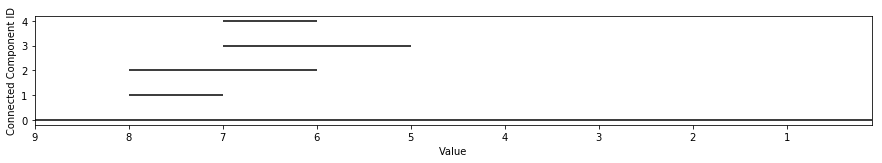

In [27]:
height = 2 + len(pd) // 10
plt.figure(figsize=(15,height))
plt.hlines(y=y, xmin=xmin, xmax=xmax)
plt.xlim(xlim[0], xlim[1])
plt.xlabel('Value')
plt.ylabel('Connected Component ID')
plt.show()

### Visualization 2

In [28]:
y = np.arange(0, len(pd2))

In [29]:
xmin = [f[0] for f in pd2]
xmax = [data.max()*1.1 if f[1] == -1 else f[1] for f in pd2]
xlim = (min(xmin), max(xmax))

In [30]:
if reverse:
    xmin, xmax = [cube.max() - x + 1 for x in xmax], [cube.max() - x + 1 for x in xmin]
    xlim = (max(xmax), min(xmin))

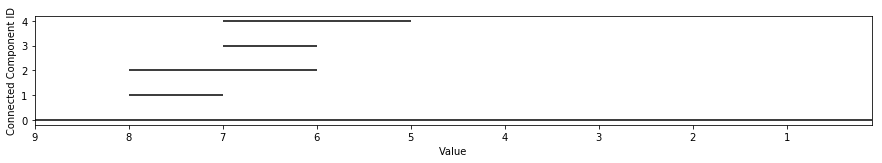

In [31]:
height = 2 + len(pd2) // 10
plt.figure(figsize=(15,height))
plt.hlines(y=y, xmin=xmin, xmax=xmax)
plt.xlim(xlim[0], xlim[1])
plt.xlabel('Value')
plt.ylabel('Connected Component ID')
plt.show()